In [1]:
CUDA_INDEX = 1
NAME = 'DBLP'
CLASSES = 8

In [2]:
import sys
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

<module 'neuro.viz' from '../../neuro/viz.py'>

In [4]:
model = models.NormSEDModel(8, CLASSES, 64, 64)
model.load_state_dict(torch.load(f'../runlogs/{NAME}/1628504752.911032/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [5]:
nn_model = models.NeuralSiameseModel(8, CLASSES, 64, 64)
nn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-NN/1633359201.1896996/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [6]:
dual_model = models.DualNormSEDModel(8, CLASSES, 64, 64)
dual_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Dual/1633375165.1109731/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [7]:
inner_test_set, _ = torch.load(f'/data/rishabh/neurosim/final/data/{NAME}/inner_test.pt', map_location='cpu')
inner_queries, inner_targets, _, _ = inner_test_set

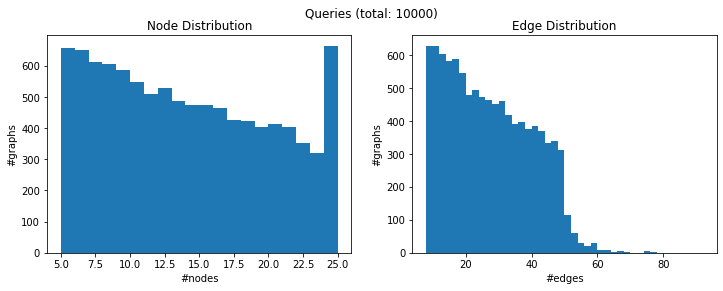

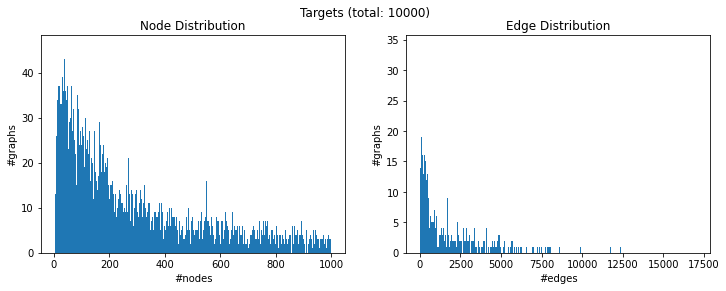

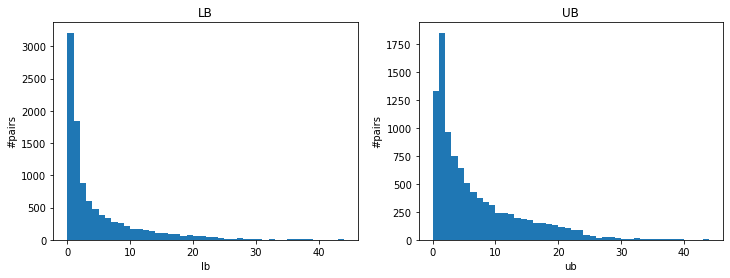

In [10]:
viz.plot_dataset_dist(inner_test_set)

In [8]:
config.n_workers = 1
tic = time.time()
inner_pred = model.predict_inner(inner_queries, inner_targets, batch_size=4096)
toc = time.time()
torch.save(inner_pred, f'../preds/{NAME}/inner_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f}s')

batch predict inner dataset
config.n_workers: 1


batches:   0%|          | 0/3 [00:00<?, ?it/s]

NeuroGSim prediction time: 6.307s


In [9]:
config.n_workers = 1
tic = time.time()
nn_inner_pred = nn_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
toc = time.time()
torch.save(nn_inner_pred, f'../preds/{NAME}/nn_inner_pred.pt')
print(f'NeuroGSim-NN prediction time: {toc-tic:.3f}s')

batch predict inner dataset
config.n_workers: 1


batches:   0%|          | 0/3 [00:00<?, ?it/s]

NeuroGSim-NN prediction time: 8.242s


In [10]:
config.n_workers = 1
tic = time.time()
dual_inner_pred = dual_model.predict_inner(inner_queries, inner_targets, batch_size=4096)
toc = time.time()
torch.save(dual_inner_pred, f'../preds/{NAME}/dual_inner_pred.pt')
print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f}s')

batch predict inner dataset
config.n_workers: 1


batches:   0%|          | 0/3 [00:00<?, ?it/s]

NeuroGSim-Dual prediction time: 8.039s


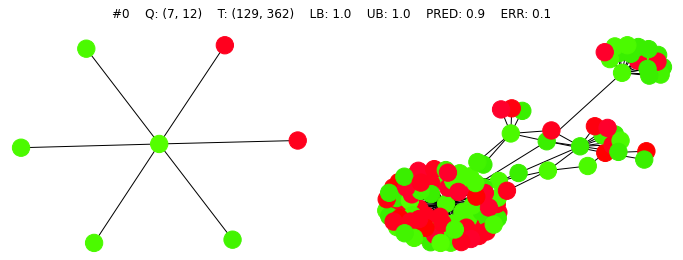

---

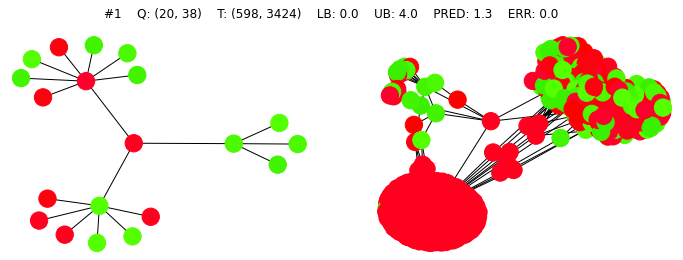

---

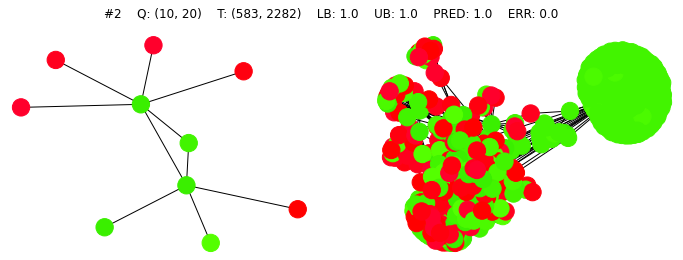

---

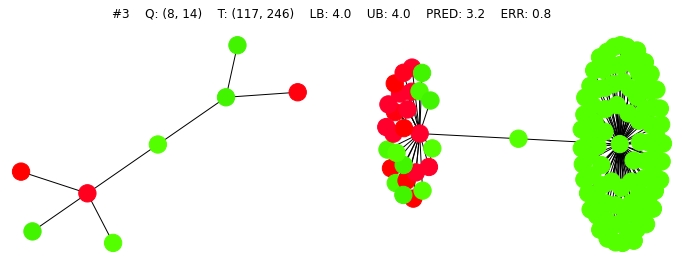

---

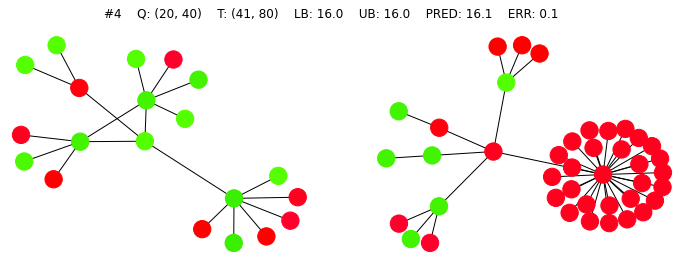

---

In [8]:
viz.plot_inner_dataset(inner_test_set, inner_pred, n_items=5)

In [9]:
config.n_workers = 1
config.method_name = ['branch']
config.method_args = ['']
tic = time.time()
b_inner_lb, b_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
b_inner_pred = (b_inner_lb+b_inner_ub)/2
toc = time.time()
torch.save(b_inner_pred, f'../preds/{NAME}/b_inner_pred.pt')
print(f'Branch prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['branch']
method_args: ['']


pairs:   0%|          | 0/10000 [00:00<?, ?it/s]

Branch prediction time: 626.489 s 


In [10]:
config.n_workers = 1
config.method_name = ['f2']
config.method_args = ['--time-limit 0.1']
tic = time.time()
f2_inner_lb, f2_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
f2_inner_pred = (f2_inner_lb+f2_inner_ub)/2
toc = time.time()
torch.save(f2_inner_pred, f'../preds/{NAME}/f2_inner_pred.pt')
print(f'F2 prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['f2']
method_args: ['--time-limit 0.1']


pairs:   0%|          | 0/10000 [00:00<?, ?it/s]

F2 prediction time: 1979.185 s 
